In [1]:
import sys
import matplotlib.pylab as plt
from work005a import *

# Work001: test critic step

In [2]:
# @ Env
s = env_init() # (1, Ns)
y = env_observe(s) # (1, Ny)

# @ Agent
u, net_pi, net_q, optimizer_actor, optimizer_critic = agent_init(y) 
# u  (1, Nu)

Y = [y,]
U = [u,]

In [3]:
Nstep = 2**13

In [4]:
for k1 in range(Nstep):
    sys.stdout.write('\r%04d' % k1)
# @ Env
    s_next = env_step(s, u) # (1, Ns)
    r = env_reward(s_next) # (1, 1)
    y_next = env_observe(s_next) # (1, Ny)

# @ Agent
    u_next = agent_step(y_next, net_pi) # (1, Nu)

# update actor
    _grad_actor = actor_step(y, u, y_next, u_next, r, net_pi, net_q)
    optimizer_actor.apply_gradients(
        zip(_grad_actor, net_pi.trainable_variables))

# update critic
    _grad_critic = critic_step(y, u, y_next, u_next, r, net_pi, net_q)
    optimizer_critic.apply_gradients(
        zip(_grad_critic, net_q.trainable_variables))

# update (s, u)
    s = s_next
    u = u_next
    y = y_next
    
    Y.append(y)
    U.append(u)


8191

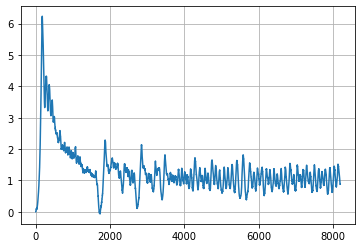

In [5]:
U_numpy = np.concatenate(U, axis=0)
Y_numpy = np.concatenate(Y, axis=0)

plt.plot(Y_numpy)
plt.grid()